In [13]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
from sklearn.datasets import make_blobs
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn

device = "mps" if torch.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [14]:
# Generate synthetic data
NUM_SAMPLES = 1000
CENTERS = 5
STD = 1.5

X, y = make_blobs(n_samples=NUM_SAMPLES, n_features=2, centers=CENTERS, cluster_std=STD, random_state=42) # type: ignore

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

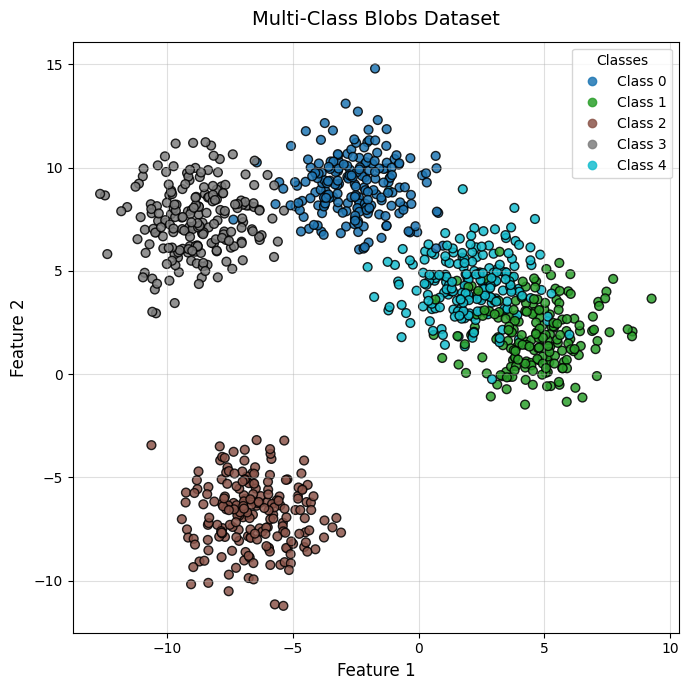

In [16]:
# Plot
plt.figure(figsize=(7, 7))

scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap="tab10",
    s=40,
    edgecolor="k",
    alpha=0.85
)

plt.title("Multi-Class Blobs Dataset", fontsize=14, pad=12)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add color legend
handles, _ = scatter.legend_elements()
labels = [f"Class {i}" for i in np.unique(y)]
plt.legend(handles, labels, title="Classes", loc="best")

plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


In [17]:
blob_classification_model = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.Linear(in_features=16, out_features=16),
    nn.Linear(in_features=16, out_features=16),
    nn.Linear(in_features=16, out_features=CENTERS),
).to(device=device)

In [18]:
# loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(blob_classification_model.parameters(), lr=0.01)

In [19]:
# numpy array to tensors and move tensors to device
X_train = torch.from_numpy(X_train).float().to(device)
X_test  = torch.from_numpy(X_test).float().to(device)

y_train = torch.from_numpy(y_train).long().to(device)
y_test  = torch.from_numpy(y_test).long().to(device)

In [20]:
# set the random seed
torch.manual_seed(42)

# set epochs
epochs = 1001

for epoch in range(epochs):
    # enter training mode
    blob_classification_model.train()

    # forward pass
    y_logits = blob_classification_model(X_train).squeeze()
    y_pred = y_logits.argmax(dim=1)

    # calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # zero the gradients
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step in direction of steepest descent
    optimizer.step()

    # evaluate the model every ten epochs
    if epoch % 10 == 0:
        blob_classification_model.eval()
        with torch.inference_mode():
            test_logits = blob_classification_model(X_test)
            test_pred = test_logits.argmax(dim=1)

            test_loss = loss_fn(test_logits, y_test)
            test_acc = accuracy_fn(y_test, test_pred)

            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.43288, Acc: 31.87% | Test Loss: 1.35842, Test Acc: 33.00%
Epoch: 10 | Loss: 0.96477, Acc: 60.75% | Test Loss: 0.98695, Test Acc: 58.50%
Epoch: 20 | Loss: 0.79638, Acc: 69.00% | Test Loss: 0.81698, Test Acc: 66.50%
Epoch: 30 | Loss: 0.68458, Acc: 75.12% | Test Loss: 0.70075, Test Acc: 73.00%
Epoch: 40 | Loss: 0.60068, Acc: 78.25% | Test Loss: 0.61279, Test Acc: 75.00%
Epoch: 50 | Loss: 0.53423, Acc: 81.50% | Test Loss: 0.54287, Test Acc: 78.50%
Epoch: 60 | Loss: 0.48145, Acc: 87.12% | Test Loss: 0.48727, Test Acc: 84.00%
Epoch: 70 | Loss: 0.43963, Acc: 89.75% | Test Loss: 0.44334, Test Acc: 88.00%
Epoch: 80 | Loss: 0.40607, Acc: 91.25% | Test Loss: 0.40830, Test Acc: 90.00%
Epoch: 90 | Loss: 0.37864, Acc: 91.88% | Test Loss: 0.37983, Test Acc: 90.50%
Epoch: 100 | Loss: 0.35586, Acc: 92.00% | Test Loss: 0.35630, Test Acc: 90.50%
Epoch: 110 | Loss: 0.33673, Acc: 91.88% | Test Loss: 0.33658, Test Acc: 91.00%
Epoch: 120 | Loss: 0.32052, Acc: 91.88% | Test Loss: 0.31988, T

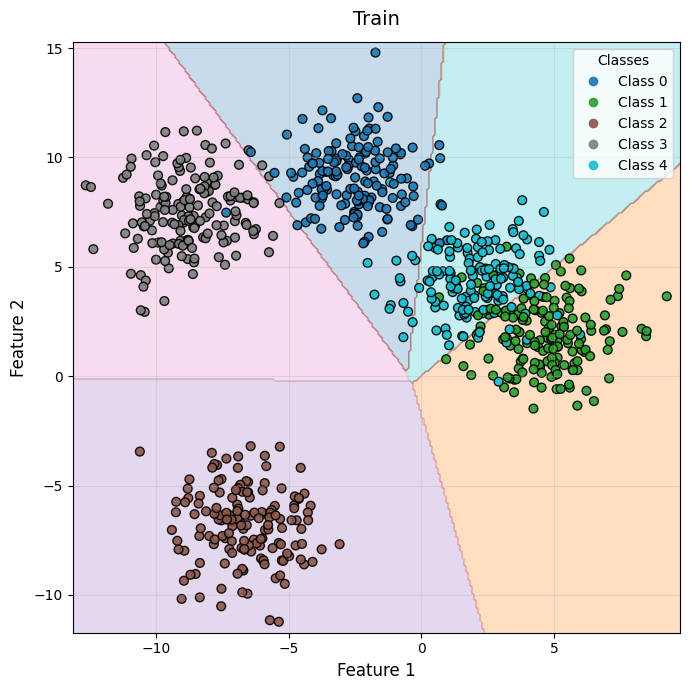

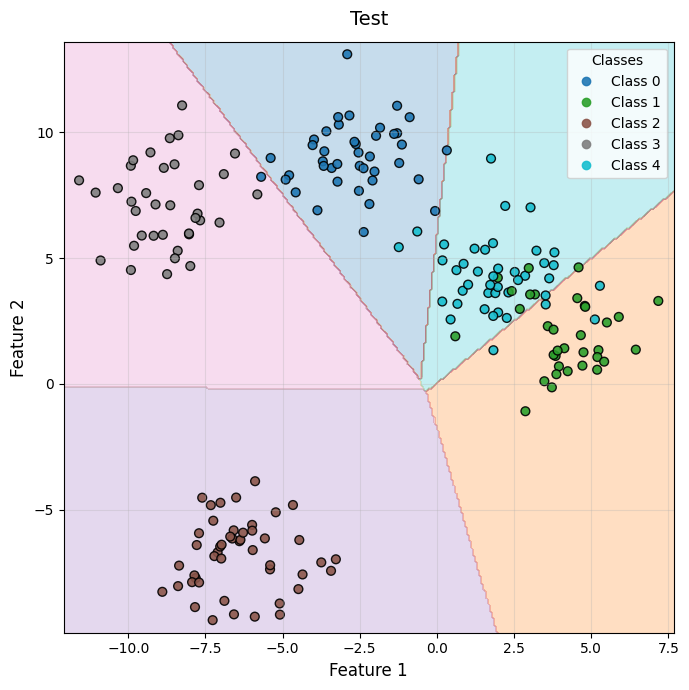

In [22]:
plot_decision_boundaries(blob_classification_model,
                         X_train, y_train,
                         X_test, y_test,
                         title="Train vs Test Decision Boundaries")